# **Ex2- Linear Regression, Naive Base, Decision Tree

## Names and IDs

1.   Noam Shani 209969245
2.   List item

**Introduction**

This assignment will focus on the linear \ Logistic regression and Decision Trees.
There are two parts: Theoretical and Coding.

# Theoretical



## 1. Decision Tree (15 points)
You will be using a decision tree to classify whether an advertisement was clicked based on its size, position, and whether it played a sound.


1.	Assume that Position is chosen for the root of the decision tree. What is the information gain associated with this attribute? (8 points)
2.	Draw the full decision tree learned from this data (without any pruning). (7 points)


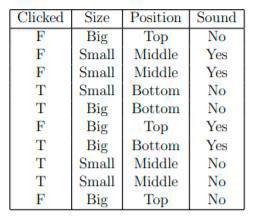

## 2. Naive Base (10 points)
For the same data Using Naïve Base what is the prediction of the new Sample $(big,Middle,No)$.

# 3. Understanding (16 points)
1.  Describe the analytical solution for linear regression with MSE as a distance function. (4 points)
2. What is the problem with information gain? Describe any solution for it. (4 points)
3. Why do we use Gradient Descent or Neotun Roffson for Linear Regression? (4 points)
4. Explain how a Decision tree is used for regression problems. (4 points)

# Code

## Import All Packages
Add all imports needed for this notebook to run

In [83]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Titanic Dataset
The famous Titanic dataset includes 1309 passengers with nine attributes.
In the following question, we will use seven features to classify whether this passenger survived.  
Please use the given dataset and not from another source.

# 1.Logistic regression vs classification tree (19 Points)

Make the classification using  models Logistic regression and Decsion tree models.  
Usr sklearn: sklearn.linear_model.LogisticRegression, sklearn.tree.DecisionTreeClassifier

*   Load the data.
*   Deal with missing values. (5 points)
*   Split Train-Test 20:80 using sklearn.model_selection:train_test_split. (3 pints)
*   Apply Logistic regression. (5 points)
*   Apply Descion tree with max_depth=6 (5 points).
*   Calculate the Acuracey using  sklearn.metrics:accuracy_score. (1 points)


In [84]:
# Load the data
data = pd.read_csv('Titanic.csv')

In [85]:
#Q1

# Deal with missing values
data.dropna(inplace=True)

# Split Train-Test 20:80
X = data[['Age', 'Fare', 'sibsp', 'Parch', 'Pclass']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Apply Decision tree with max_depth=6
tree_model = DecisionTreeClassifier(max_depth=6)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Calculate the Accuracy
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)

Logistic Regression Accuracy: 0.7394636015325671
Decision Tree Accuracy: 0.7432950191570882


# 2.PreProning (15 Points)
For the same problem described above:
*   Find the best max depth in the range [1,8] of the decision tree using the function sklearn.model_selection.GridSearchCV.


In [86]:
#Q2

# Deal with missing values
data.dropna(inplace=True)

# Split Train-Test 20:80
X = data[['Age', 'Fare', 'sibsp', 'Parch', 'Pclass']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of max_depth
max_depth_range = range(1, 9)

# Create a dictionary for the hyperparameter grid
param_grid = {'max_depth': max_depth_range}

# Instantiate the Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best max_depth
best_max_depth = grid_search.best_params_['max_depth']

print("Best max_depth:", best_max_depth)



Best max_depth: 5


# 3.Entropy vs Gini (10 Points)
For the same problem described above:

*   Use max_depth From question 2.
*   Train the model with Entropy. (5 points)
*   Train the model with Gini. (5 points)
*   Using Accuracy score who is better? (5 points)



In [87]:
#Q3

# Deal with missing values
data.dropna(inplace=True)

# Split Train-Test 20:80
X = data[['Age', 'Fare', 'sibsp', 'Parch', 'Pclass']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with Entropy
entropy_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
entropy_tree_model.fit(X_train, y_train)
entropy_tree_predictions = entropy_tree_model.predict(X_test)

# Train the model with Gini
gini_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5)
gini_tree_model.fit(X_train, y_train)
gini_tree_predictions = gini_tree_model.predict(X_test)

# Calculate accuracy using accuracy_score
entropy_accuracy = accuracy_score(y_test, entropy_tree_predictions)
gini_accuracy = accuracy_score(y_test, gini_tree_predictions)

print("Accuracy with Entropy:", entropy_accuracy)
print("Accuracy with Gini:", gini_accuracy)

if entropy_accuracy > gini_accuracy:
    print("The model trained with Entropy is better.")
elif entropy_accuracy < gini_accuracy:
    print("The model trained with Gini is better.")
else:
    print("Both models have the same accuracy.")


Accuracy with Entropy: 0.7318007662835249
Accuracy with Gini: 0.7662835249042146
The model trained with Gini is better.


# 4. Gradient Descent (15 points)

* Assume we have $𝑓(𝑥,𝑦) = 𝑥^2/9+𝑦^2/64$
* Use gradient descent to find local minima, start at $(8.5,8.6)$
* Make 1000 Iteration.

Local minimum found at: [1.47768422e-09 3.76013284e-01]


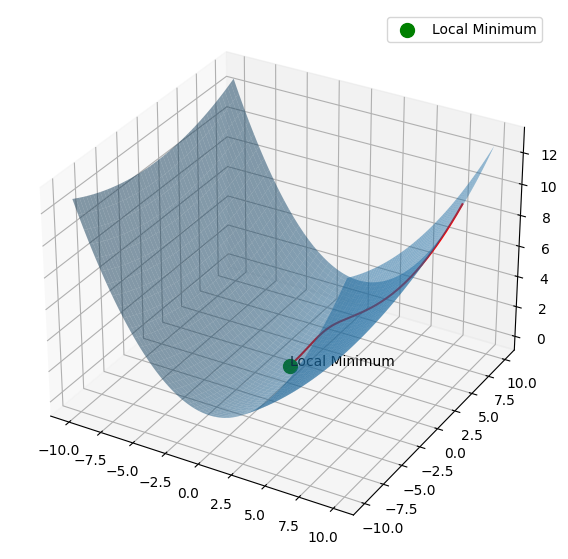

In [101]:
#Q4

#Given imports
import numpy as np
import matplotlib.pyplot as plt

#Given function
def func(x,y):
  return np.power(x,2)/9 + np.power(y,2)/64

#Returns the Gradient for the given function int Q4
def grad_func(x, y):
    grad_x = 2 * x / 9
    grad_y = 2 * y / 64
    return grad_x, grad_y

#The Gradient Descent function
def gradient_descent(starting_point, learning_rate, num_iterations):
    # Set Starting Point (x,y)
    x, y = starting_point
    # initialize trajectory as array, first initialized with starting point
    trajectory = [starting_point]
    for _ in range(num_iterations):
        grad_x, grad_y = grad_func(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        trajectory.append((x, y))
    return trajectory

#Given code
x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt. figure(figsize=(7, 7))
ax = plt.axes (projection='3d' )
ax. plot_surface(X, Y, Z, alpha=0.5)

#Our code
starting_point = (8.5, 8.6)
learning_rate = 0.1
num_iterations = 1000

trajectory = gradient_descent(starting_point, learning_rate, num_iterations)
trajectory = np.array(trajectory)
ax.plot3D(trajectory[:, 0], trajectory[:, 1], func(trajectory[:, 0], trajectory[:, 1]), 'r')

# Print and annotate the local minimum
local_minima = trajectory[-1]
print("Local minimum found at:", local_minima)
ax.scatter(local_minima[0], local_minima[1], func(*local_minima), color='g', s=100, label='Local Minimum')
ax.text(local_minima[0], local_minima[1], func(*local_minima), "Local Minimum", color='black')

plt.legend()
plt.show()